# 1) TD LEARNING

In [324]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
%pylab inline
import random
from IPython.display import Image
import matplotlib.patches as patches

Populating the interactive namespace from numpy and matplotlib


In [325]:
gamma = 0.6 # discounting rate
reward_size = -1
grid_size_x = 5
grid_size_y = 10
alpha = 0.5
wall_states = [[4, 7], [3, 7], [2, 7]]
reward_state = [3, 9]
actions = [[-1, 0], [1, 0], [0, 1], [0, -1]]
num_episodes = 10000
episode_length = 1000

In [326]:
# initialization
V = np.zeros((grid_size_x, grid_size_y))
for state in wall_states:
    V[state[0]][state[1]] = float(-inf)
print(V)
returns = {(i, j):list() for i in range(grid_size_x) for j in range(grid_size_y)}
deltas = {(i, j):list() for i in range(grid_size_x) for j in range(grid_size_y)}
print('deltas: ', deltas)
states = [[i, j] for i in range(grid_size_x) for j in range(grid_size_y)]
print('states: ', states)

[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0. -inf   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0. -inf   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0. -inf   0.   0.]]
deltas:  {(0, 0): [], (0, 1): [], (0, 2): [], (0, 3): [], (0, 4): [], (0, 5): [], (0, 6): [], (0, 7): [], (0, 8): [], (0, 9): [], (1, 0): [], (1, 1): [], (1, 2): [], (1, 3): [], (1, 4): [], (1, 5): [], (1, 6): [], (1, 7): [], (1, 8): [], (1, 9): [], (2, 0): [], (2, 1): [], (2, 2): [], (2, 3): [], (2, 4): [], (2, 5): [], (2, 6): [], (2, 7): [], (2, 8): [], (2, 9): [], (3, 0): [], (3, 1): [], (3, 2): [], (3, 3): [], (3, 4): [], (3, 5): [], (3, 6): [], (3, 7): [], (3, 8): [], (3, 9): [], (4, 0): [], (4, 1): [], (4, 2): [], (4, 3): [], (4, 4): [], (4, 5): [], (4, 6): [], (4, 7): [], (4, 8): [], (4, 9): []}
states:  [[0, 0], [0, 1], [0, 2], [0, 3], [0, 4], [0, 5], [0, 6], [0, 7], [0, 8], [0, 9], [1, 0], [1, 1], [1, 2], [1, 3], [1

In [327]:
# utils
def generate_initial_state():
    init_state = random.choice(states[1:-1])
    while init_state in wall_states:
        init_state = random.choice(states[1:-1])
    return init_state

def generate_next_action():
    return random.choice(actions)

def take_action(state, action):
    final_state = np.array(state)+np.array(action)
    
    if (-1 in list(final_state) 
    or grid_size_x in list(final_state) or grid_size_y in list(final_state) 
    or list(final_state) in wall_states):
        # this means that the robot doesn't move
        # it stays in the same state that it was given
        final_state = state
    
    # this is the reward 20 state
    if (list(final_state) == reward_state):
        return 20, list(final_state) 
        
    return reward_size, list(final_state)

In [328]:
for ep in tqdm(range(num_episodes)):
    # episode starts at a random cell
    state = generate_initial_state()
    
    for _ in range(episode_length):
        action = generate_next_action()
        reward, final_state = take_action(state, action)
            
        # modify value function
        before = V[state[0], state[1]]
        V[state[0], state[1]] += alpha*(reward + gamma*V[final_state[0], final_state[1]] - V[state[0], state[1]])
        deltas[state[0], state[1]].append(float(np.abs(before-V[state[0], state[1]])))
        state = final_state

100%|██████████| 10000/10000 [03:57<00:00, 42.07it/s]


In [329]:
print(V)

[[-2.5        -2.5        -2.5        -2.5        -2.5        -2.49944691
  -2.49882407 -2.47955336 -2.06871399 -2.46759428]
 [-2.5        -2.5        -2.5        -2.5        -2.5        -2.49185502
  -2.4986648  -2.34673206 -1.70199232 -2.002704  ]
 [-2.5        -2.5        -2.5        -2.5        -2.5        -2.4999106
  -2.49758696        -inf  0.8476442   8.4089595 ]
 [-2.5        -2.5        -2.5        -2.5        -2.5        -2.49997903
  -2.49991753        -inf  0.99471693 17.12453885]
 [-2.5        -2.5        -2.5        -2.5        -2.5        -2.49999396
  -2.49997769        -inf -0.33241242 12.0851291 ]]


In [330]:
def visualize():
    # parameters for the axis
    # remember that x and y are switched when plotting on graphs
    x_axis_size, y_axis_size = V.shape[1], V.shape[0]
    title = "TD LEARNING"
    xticklabels = range(0, grid_size_y)
    yticklabels = range(0, grid_size_x)
    fig, ax = plt.subplots()
    
    # set axis limits
    ax.set_xlim(xticklabels[0], xticklabels[-1]+1)
    ax.set_ylim(yticklabels[0], yticklabels[-1]+1)

    # Let the grid be aligned on the major axes
    ax.set_xticks(np.array(xticklabels), minor=False)
    ax.set_yticks(np.array(yticklabels), minor=False)

    # But offset the minor axes so that the labels appear
    # between grids
    ax.set_xticks(np.array(xticklabels)+0.5, minor=True)
    ax.set_yticks(np.array(yticklabels)+0.5, minor=True)

    # Don't show tick labels for major axes
    ax.set_xticklabels("", minor=False)
    ax.set_yticklabels("", minor=False)

    # Show tick labels for minor axis
    ax.set_xticklabels(xticklabels, minor=True)
    ax.set_yticklabels(yticklabels, minor=True)

    # set title and x/y labels
    ax.set_title(title, y=1.1)

    # Put x-axis at top of image
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top') 
    plt.grid(True, which="major", linestyle='--')
    plt.tight_layout()
    
    # add V values in middle of grid
    text_objects = []   
    for x in range(grid_size_y):
        for y in range(grid_size_x):
            txt = ax.text(x+0.5, y+0.5, "%.3f" % V[y,x], ha="center", va="center")
            text_objects.append(txt)

    # Invert the axis
    ax.invert_yaxis()

    # draw walls
    for state in wall_states:
        rect = patches.Rectangle([state[1], state[0]], 1,1, linewidth=1, edgecolor='b', facecolor='none')
        ax.add_patch(rect)
        
    # draw reward
    rect = patches.Rectangle([reward_state[1], reward_state[0]], 1,1, linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)


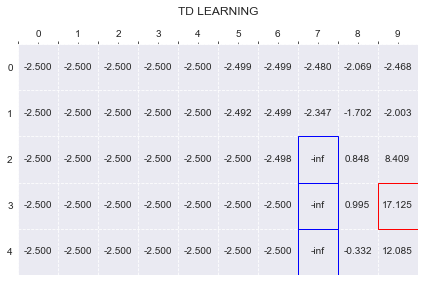

In [331]:
visualize()

## ›using gamma = 0.1 // alpha = 0.1 (convergence)

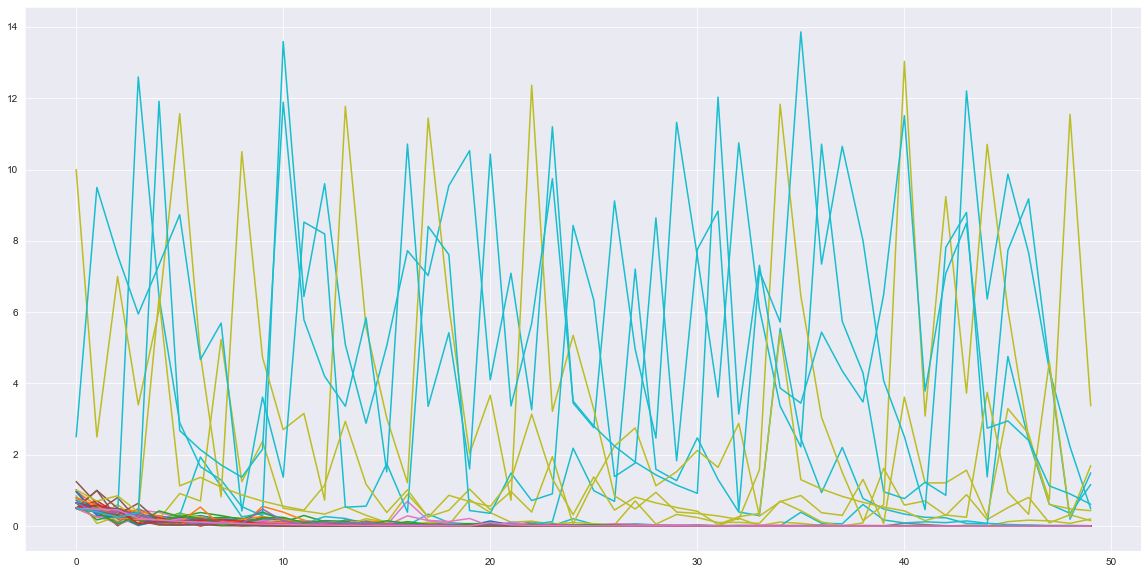

In [337]:
plt.figure(figsize=(20,10))
all_series = [list(x)[:50] for x in deltas.values()]
for series in all_series:
    plt.plot(series)

# 2) Q-LEARNING : SARSA

In [395]:
lr = 0.01
eps = 0.3
gamma = 0.95
eps_decay = 0.00005

grid_size_x = 5
grid_size_y = 10

actions = [[-1, 0], [1, 0], [0, 1], [0, -1]]
wall_states = [[4, 7], [3, 7], [2, 7]]
reward_state = [3, 9]

def create_states():
    states = dict()
    
    idx = 0
    for i in range(grid_size_x):
        for j in range(grid_size_y):
            states[idx] = [i, j]
            idx += 1
    
    return states

states_dict = create_states()
print(states_dict)

key_list = list(states_dict.keys())
val_list = list(states_dict.values())
 
# # print key with val 100
# position = val_list.index([0, 1])
# print(key_list[position])
# print()

print(random.choice(list(states.keys())))

num_episodes = 10000



{0: [0, 0], 1: [0, 1], 2: [0, 2], 3: [0, 3], 4: [0, 4], 5: [0, 5], 6: [0, 6], 7: [0, 7], 8: [0, 8], 9: [0, 9], 10: [1, 0], 11: [1, 1], 12: [1, 2], 13: [1, 3], 14: [1, 4], 15: [1, 5], 16: [1, 6], 17: [1, 7], 18: [1, 8], 19: [1, 9], 20: [2, 0], 21: [2, 1], 22: [2, 2], 23: [2, 3], 24: [2, 4], 25: [2, 5], 26: [2, 6], 27: [2, 7], 28: [2, 8], 29: [2, 9], 30: [3, 0], 31: [3, 1], 32: [3, 2], 33: [3, 3], 34: [3, 4], 35: [3, 5], 36: [3, 6], 37: [3, 7], 38: [3, 8], 39: [3, 9], 40: [4, 0], 41: [4, 1], 42: [4, 2], 43: [4, 3], 44: [4, 4], 45: [4, 5], 46: [4, 6], 47: [4, 7], 48: [4, 8], 49: [4, 9]}
22


In [396]:
def eps_greedy(Q, state, eps=0.1):
    '''
    Epsilon greedy policy
    '''
    if np.random.uniform(0,1) < eps:
        # Choose a random action
        return np.random.randint(Q.shape[1])
    else:
        # Choose the action of a greedy policy
        return greedy(Q, state)


def greedy(Q, state):
    '''
    Greedy policy
    return the index corresponding to the maximum action-state value
    '''
    return np.argmax(Q[state])


def run_episodes(env, Q, num_episodes=100, to_print=False):
    '''
    Run some episodes to test the policy
    '''
    tot_rew = []
    state = generate_inital_state()

    for _ in range(num_episodes):
        done = False
        game_rew = 0

        while not done:
            # select a greedy action
            next_state, rew, done, _ = env.step(greedy(Q, state))

            state = next_state
            game_rew += rew 
            if done:
                state = env.reset()
                tot_rew.append(game_rew)

    if to_print:
        print('Mean score: %.3f of %i games!'%(np.mean(tot_rew), num_episodes))

    return np.mean(tot_rew)

In [397]:
# utils
def generate_initial_state():
    init_state = random.choice(list(states_dict.keys()))
    while init_state in wall_states:
        init_state = random.choice(list(states_dict.keys()))
    return init_state

def generate_next_action():
    return random.choice(actions)

# this state is the int value of coords
def take_action(state, action):
    
    # convert int to coords
    state = states_dict.get(state)
    
    final_state = np.array(state)+np.array(action)
    
    if (-1 in list(final_state) 
    or grid_size_x in list(final_state) or grid_size_y in list(final_state) 
    or list(final_state) in wall_states):
        # this means that the robot doesn't move
        # it stays in the same state that it was given
        final_state = state
    
    position = val_list.index(list(final_state))
    # this is the reward 20 state
    if (list(final_state) == reward_state):
        # return the int value of state here
        return 20, key_list[position]
        
    return reward_size, key_list[position]




In [399]:
nA = len(actions)
nS = grid_size_x*grid_size_y

# Initialize the Q matrix
# Q: matrix nS*nA where each row represent a state and each colums represent a different action
Q = np.zeros((nS, nA))
print(Q)
games_reward = []
test_rewards = []

for ep in range(num_episodes):
    # state is the state number and not coord
    state = generate_initial_state()
#     done = False
    tot_rew = 0

    # decay the epsilon value until it reaches the threshold of 0.01
    if eps > 0.01:
        eps -= eps_decay


    action = eps_greedy(Q, state, eps) 

    # loop the main body until the environment stops
    
#     while not done:
    for _ in range(episode_length):
#         next_state, rew, done, _ = env.step(action) # Take one step in the environment
        next_state, rew = take_action(state, action)

        # choose the next action (needed for the SARSA update)
        next_action = eps_greedy(Q, next_state, eps) 
        # SARSA update
        Q[state][action] = Q[state][action] + lr*(rew + gamma*Q[next_state][next_action] - Q[state][action])

        state = next_state
        action = next_action
        tot_rew += rew
#         if done:
#             games_reward.append(tot_rew)

    # Test the policy every 300 episodes and print the results
    if (ep % 300) == 0:
        test_rew = run_episodes(env, Q, 1000)
        print("Episode:{:5d}  Eps:{:2.4f}  Rew:{:2.4f}".format(ep, eps, test_rew))
        test_rewards.append(test_rew)

return Q

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[4, 1]
None


TypeError: unsupported operand type(s) for +: 'NoneType' and 'int'